In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
from Problem.utils import *
import os.path
import matplotlib.pyplot as plt

In [3]:
def generate_dataset(api_key, dataset_folder_path, dataset_name, location_context, overwrite=False, save_or_not=True):
    
    if overwrite == False:
        if os.path.isfile("%s%s_coordinates.csv" % (dataset_folder_path, dataset_name)):
            raise Exception("Error: The filepath '%s%s_coordinates.csv' already exists." % (dataset_folder_path, dataset_name))
        elif os.path.isfile("%s%s_distance_matrix_HERE.csv" % (dataset_folder_path, dataset_name)):
            raise Exception("Error: The filepath '%s%s_distance_matrix_HERE.csv' already exists." % (dataset_folder_path, dataset_name))
        elif os.path.isfile("%s%s_time_matrix_HERE.csv" % (dataset_folder_path, dataset_name)):
            raise Exception("Error: The filepath '%s%s_time_matrix_HERE.csv' already exists." % (dataset_folder_path, dataset_name))

    meta_data, distance_data, station_data = parse_UK_Data("%s%s.txt" % (dataset_folder_path, dataset_name))

    station_coordinates = generate_coordinates(station_data, location_context, to_csv=save_or_not, filename="%s%s.txt" % (dataset_folder_path, dataset_name))

    points_coordinate = station_coordinates[["lat", "lng"]].to_numpy()

    distance_matrix_here, time_matrix_here, _ = generate_large_distance_matrix(points_coordinate, api_key)
    
    if save_or_not:
        save_here_data(dataset_folder_path, dataset_name, distance_matrix_here, time_matrix_here)
    
    return points_coordinate, distance_matrix_here, time_matrix_here

In [15]:
api = "Tfmt6Sxyn-nfinSHUyUo3xmVDWdtwAUyh6C8Y3HTZhU"

dataset_folder_path = "../datasets/UK75/"
datasets = ["UK75_6"]
location_context = "United Kingdom"
for dataset in datasets:
    points_coordinate, distance_matrix_here, time_matrix_here = generate_dataset(api, dataset_folder_path, dataset, location_context, save_or_not=True)

[City:  Brackley] [lat: 52.029761] [lng: -1.148458]: 100%|██████████| 76/76 [01:36<00:00,  1.26s/it]      
  0%|          | 0/38 [00:00<?, ?it/s]

Len City Name: 76 
 Lat: 76 
 Long: 76
Len City Name: 76 
 Lat: 76 
 Long: 76


[Q: 37]: 100%|██████████| 38/38 [03:53<00:00,  6.14s/it]


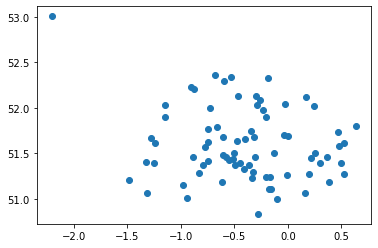

In [16]:
plt.scatter(points_coordinate[:,1],points_coordinate[:,0])